In [997]:
import pandas as pd
csvpath = 'https://github.com/eliaskarikas/predictingNHLsalary/blob/master/nhldata.csv?raw=true'
df = pd.read_csv(csvpath,index_col=0)
df

,CLAUSE,EXPIRY,CAP HIT,SALARY,rank,Player,TEAM,AGE,POS,GP,...,xGA,xGF%,W,L,SO,GAA,Sv%,GA60,xGA60,GSAx60
1,NMC,UFA,"$11,642,857","$13,000,000",2,Artemi Panarin,NYR,28,LW,42,...,30.54,65.33,-,-,-,-,-,-,-,-
2,NaN,UFA,"$11,640,250","$15,900,000",3,Auston Matthews,TOR,22,C,52,...,40.53,65.52,-,-,-,-,-,-,-,-
3,NMC,UFA,"$11,500,000","$12,000,000",4,Erik Karlsson,SJS,30,RD,52,...,62.42,50.17,-,-,-,-,-,-,-,-
4,NMC,UFA,"$11,000,000","$10,000,000",5,Drew Doughty,LAK,30,RD,56,...,70.83,49.66,-,-,-,-,-,-,-,-
5,NMC,UFA,"$11,000,000","$12,000,000",6,John Tavares,TOR,29,C,56,...,39.89,63.64,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,NaN,UFA,"$700,000","$700,000",1506,Antti Suomela,TOR,26,C,4,...,0.97,57.08,-,-,-,-,-,-,-,-
1506,NaN,RFA,"$700,000","$700,000",1507,Michael Amadio,OTT,24,"C, RW",25,...,13.99,50.76,-,-,-,-,-,-,-,-
1507,NaN,RFA,"$700,000","$700,000",1508,Gustav Forsling,FLA,24,LD,43,...,39.38,50.76,-,-,-,-,-,-,-,-
1508,NaN,UFA,"$700,000","$700,000",1509,David Gust,CAR,26,RW,0,...,0.00,0.00,-,-,-,-,-,-,-,-


In [998]:
df.dtypes

CLAUSE     object
EXPIRY     object
CAP HIT    object
SALARY     object
rank        int64
Player     object
TEAM       object
AGE         int64
POS        object
GP          int64
G          object
A          object
P          object
P/GP       object
+/-        object
Sh         object
Sh%        object
TOI        object
ixG        object
iSh        object
iCF        object
iFF        object
ixG60      object
iSh60      object
iCF60      object
iFF60      object
SF         object
SA         object
SF%        object
CF         object
CA         object
CF%        object
FF         object
FA         object
FF%        object
xGF        object
xGA        object
xGF%       object
W          object
L          object
SO         object
GAA        object
Sv%        object
GA60       object
xGA60      object
GSAx60     object
dtype: object

In [999]:
# Columns to drop:
# Player Name
# Team
# Clause
# Expiry
dropped_df = df.drop(["Player", "TEAM", "CLAUSE", "EXPIRY"], axis = 1)
dropped_df

,CAP HIT,SALARY,rank,AGE,POS,GP,G,A,P,P/GP,...,xGA,xGF%,W,L,SO,GAA,Sv%,GA60,xGA60,GSAx60
1,"$11,642,857","$13,000,000",2,28,LW,42,17,41,58,1.38,...,30.54,65.33,-,-,-,-,-,-,-,-
2,"$11,640,250","$15,900,000",3,22,C,52,41,25,66,1.27,...,40.53,65.52,-,-,-,-,-,-,-,-
3,"$11,500,000","$12,000,000",4,30,RD,52,8,14,22,0.42,...,62.42,50.17,-,-,-,-,-,-,-,-
4,"$11,000,000","$10,000,000",5,30,RD,56,8,26,34,0.61,...,70.83,49.66,-,-,-,-,-,-,-,-
5,"$11,000,000","$12,000,000",6,29,C,56,19,31,50,0.89,...,39.89,63.64,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,"$700,000","$700,000",1506,26,C,4,0,0,0,0.00,...,0.97,57.08,-,-,-,-,-,-,-,-
1506,"$700,000","$700,000",1507,24,"C, RW",25,0,3,3,0.12,...,13.99,50.76,-,-,-,-,-,-,-,-
1507,"$700,000","$700,000",1508,24,LD,43,5,12,17,0.40,...,39.38,50.76,-,-,-,-,-,-,-,-
1508,"$700,000","$700,000",1509,26,RW,0,0,0,0,0.00,...,0.00,0.00,-,-,-,-,-,-,-,-


In [1000]:
# Transforming G and A into G/GP and A/GP; dropping GP and P (redundant)
def convertToInt(val):
    try:
        return int(val)
    except:
        return 0;
    
def convertToFloat(val):
    try:
        return float(val)
    except:
        return 0;

goalsPerGame_df = dropped_df["G"].apply(convertToInt) / dropped_df["GP"]
goalsPerGame_df = goalsPerGame_df.fillna(0)
dropped_df["G/GP"] = list(goalsPerGame_df)

assistsPerGame_df = dropped_df["A"].apply(convertToInt) / dropped_df["GP"]
assistsPerGame_df = assistsPerGame_df.fillna(0)
dropped_df["A/GP"] = list(assistsPerGame_df)

dropped_df = dropped_df.drop(["G", "A",'rank'], axis = 1)

In [1001]:
# Transforming "+/-" column to be integers and converting all "-" values
# to "0" since goalies don't technically have any impact offensively or
# defensively (defending the goal can be considered slightly different
# conceptually from defending where for field players that are defending,
# you try to block the opponent from moving their team forward and
# attempting shots to score).
    
dropped_df["+/-"] = dropped_df["+/-"].apply(convertToInt)

In [1002]:
# Dropping columns "Sh", "SF", and "SA" because they can be derived from 
# "Sh%" and "SF%", which are more descriptive features
dropped_df = dropped_df.drop(["Sh", "SF", "SA"], axis = 1)

In [1003]:
# Converting the "-" values put for goalies into 0. Our model, which does
# classification, should be able to recognize that the fact a player is a
# goalie will change the importance of stats like these which are generally
# more important for field players.
dropped_df["Sh%"] = dropped_df["Sh%"].apply(convertToFloat)
dropped_df["SF%"] = dropped_df["SF%"].apply(convertToFloat)

In [1004]:
# Dropping "TOI" since the other stats like assists and goals can be
# correlated to time on ice, making this feature somewhat irrelevant and
# redundant.
dropped_df = dropped_df.drop("TOI", axis = 1)

In [1005]:
# Dropping columns "CF", "CA", "FF", and "FA" because they are redundant
# as the "CF%" and "FF%" are better representations of this conceptual
# feature of Corsi's and fenwicks.
dropped_df = dropped_df.drop(["CF", "CA", "FF", "FA"], axis = 1)

In [1006]:
# Dropping columns "xGF" and "xGA" because they are redundant (use
# column "xGF%" instead)
dropped_df = dropped_df.drop(["xGF", "xGA"], axis = 1)

In [1007]:
dropped_df["ixG60"] = dropped_df["ixG60"].apply(convertToFloat)
dropped_df["iSh60"] = dropped_df["iSh60"].apply(convertToFloat)
dropped_df["iCF60"] = dropped_df["iCF60"].apply(convertToFloat)
dropped_df["iFF60"] = dropped_df["iFF60"].apply(convertToFloat)
dropped_df["xGF%"] = dropped_df["xGF%"].apply(convertToFloat)

In [1008]:
dropped_df["W"] = dropped_df["W"].apply(convertToInt)
dropped_df["L"] = dropped_df["L"].apply(convertToInt)
dropped_df["SO"] = dropped_df["SO"].apply(convertToInt)

In [1009]:
dropped_df["GAA"] = dropped_df["GAA"].apply(convertToFloat)
dropped_df["Sv%"] = dropped_df["Sv%"].apply(convertToFloat)
dropped_df["GA60"] = dropped_df["GA60"].apply(convertToFloat)
dropped_df["xGA60"] = dropped_df["xGA60"].apply(convertToFloat)
dropped_df["GSAx60"] = dropped_df["GSAx60"].apply(convertToFloat)

In [1010]:
dropped_df

,CAP HIT,SALARY,AGE,POS,GP,P,P/GP,+/-,Sh%,ixG,...,W,L,SO,GAA,Sv%,GA60,xGA60,GSAx60,G/GP,A/GP
1,"$11,642,857","$13,000,000",28,LW,42,58,1.38,14,0.16,11.20,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.404762,0.976190
2,"$11,640,250","$15,900,000",22,C,52,66,1.27,21,0.18,26.46,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.788462,0.480769
3,"$11,500,000","$12,000,000",30,RD,52,22,0.42,-18,0.07,6.13,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.153846,0.269231
4,"$11,000,000","$10,000,000",30,RD,56,34,0.61,-14,0.08,6.46,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.142857,0.464286
5,"$11,000,000","$12,000,000",29,C,56,50,0.89,12,0.12,22.31,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.339286,0.553571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,"$700,000","$700,000",26,C,4,0,0.00,0,0.00,0.26,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1506,"$700,000","$700,000",24,"C, RW",25,3,0.12,-3,0.00,2.52,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.120000
1507,"$700,000","$700,000",24,LD,43,17,0.40,17,0.05,3.40,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.116279,0.279070
1508,"$700,000","$700,000",26,RW,0,0,0.00,0,0.00,0.00,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [1011]:
pos = dropped_df["POS"]
pos.value_counts()

LD           242
C            232
RD           193
G            175
LW           113
RW           104
LW, RW        92
C, LW         78
C, RW         61
RW, LW        60
LW, C         42
RW, C         42
LD/RD         32
C, LW, RW     16
LW, RW, C      7
LW, C, RW      7
C, RW, LW      3
RW, LW, C      3
D              2
RD, RW         2
LW, LD         2
LD, LW         1
Name: POS, dtype: int64

In [1012]:
# Doing one-hot encoding on POS column
from sklearn.preprocessing import OneHotEncoder

pos = dropped_df["POS"].values.reshape(-1,1)
encoder = OneHotEncoder(sparse = False)
encoded_df = encoder.fit_transform(pos)
encoded_df = pd.DataFrame(encoded_df, columns = encoder.get_feature_names())
encoded_df.index += 1

In [1013]:
dropped_df = pd.concat([dropped_df, encoded_df], axis = 1)

In [1014]:
def convertMoneyAmountToFloat(val):
    return float("".join(val[1:].split(",")))

In [1015]:
dropped_df["CAP HIT"] = dropped_df["CAP HIT"].apply(convertMoneyAmountToFloat)
dropped_df["SALARY"] = dropped_df["SALARY"].apply(convertMoneyAmountToFloat)

In [1016]:
dropped_df

,CAP HIT,SALARY,AGE,POS,GP,P,P/GP,+/-,Sh%,ixG,...,"x0_LW, C, RW","x0_LW, LD","x0_LW, RW","x0_LW, RW, C",x0_RD,"x0_RD, RW",x0_RW,"x0_RW, C","x0_RW, LW","x0_RW, LW, C"
1,11642857.0,13000000.0,28,LW,42,58,1.38,14,0.16,11.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11640250.0,15900000.0,22,C,52,66,1.27,21,0.18,26.46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11500000.0,12000000.0,30,RD,52,22,0.42,-18,0.07,6.13,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,11000000.0,10000000.0,30,RD,56,34,0.61,-14,0.08,6.46,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,11000000.0,12000000.0,29,C,56,50,0.89,12,0.12,22.31,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,700000.0,700000.0,26,C,4,0,0.00,0,0.00,0.26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1506,700000.0,700000.0,24,"C, RW",25,3,0.12,-3,0.00,2.52,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1507,700000.0,700000.0,24,LD,43,17,0.40,17,0.05,3.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1508,700000.0,700000.0,26,RW,0,0,0.00,0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [1017]:
## Dont think we can use this one. Target needs to be in singular column.
'''from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins = 3, encode="onehot-dense", strategy="quantile")

caphit_discretized = discretizer.fit_transform(dropped_df["CAP HIT"].values.reshape(-1, 1))
caphit_df = pd.DataFrame(caphit_discretized, columns = ["Low Cap Hit", "Middle Cap Hit", "High Cap Hit"])
caphit_df.index += 1

salary_discretized = discretizer.fit_transform(dropped_df["SALARY"].values.reshape(-1, 1))
salary_df = pd.DataFrame(salary_discretized, columns = ["Low Salary", "Middle Salary", "High Salary"])
salary_df.index += 1
'''

'from sklearn.preprocessing import KBinsDiscretizer\n\ndiscretizer = KBinsDiscretizer(n_bins = 3, encode="onehot-dense", strategy="quantile")\n\ncaphit_discretized = discretizer.fit_transform(dropped_df["CAP HIT"].values.reshape(-1, 1))\ncaphit_df = pd.DataFrame(caphit_discretized, columns = ["Low Cap Hit", "Middle Cap Hit", "High Cap Hit"])\ncaphit_df.index += 1\n\nsalary_discretized = discretizer.fit_transform(dropped_df["SALARY"].values.reshape(-1, 1))\nsalary_df = pd.DataFrame(salary_discretized, columns = ["Low Salary", "Middle Salary", "High Salary"])\nsalary_df.index += 1\n'

In [1018]:
## Instead using this: ordinal encoding

dropped_df.loc[dropped_df.SALARY <= 700000, "SALARY"] = 1
dropped_df.loc[(dropped_df.SALARY <= 780000) & (dropped_df.SALARY > 700000), "SALARY"] = 2
dropped_df.loc[(dropped_df.SALARY < 800000) & (dropped_df.SALARY > 780000), "SALARY"] = 3
dropped_df.loc[(dropped_df.SALARY < 900000) & (dropped_df.SALARY >= 800000), "SALARY"] = 4
dropped_df.loc[(dropped_df.SALARY < 1000000) & (dropped_df.SALARY >= 900000), "SALARY"] = 5
dropped_df.loc[(dropped_df.SALARY < 2500000) & (dropped_df.SALARY >= 1000000), "SALARY"] = 6
dropped_df.loc[(dropped_df.SALARY < 4500000) & (dropped_df.SALARY >= 2500000), "SALARY"] = 7
dropped_df.loc[dropped_df.SALARY >= 4500000, "SALARY"] = 8
dropped_df


,CAP HIT,SALARY,AGE,POS,GP,P,P/GP,+/-,Sh%,ixG,...,"x0_LW, C, RW","x0_LW, LD","x0_LW, RW","x0_LW, RW, C",x0_RD,"x0_RD, RW",x0_RW,"x0_RW, C","x0_RW, LW","x0_RW, LW, C"
1,11642857.0,8.0,28,LW,42,58,1.38,14,0.16,11.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11640250.0,8.0,22,C,52,66,1.27,21,0.18,26.46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11500000.0,8.0,30,RD,52,22,0.42,-18,0.07,6.13,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,11000000.0,8.0,30,RD,56,34,0.61,-14,0.08,6.46,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,11000000.0,8.0,29,C,56,50,0.89,12,0.12,22.31,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,700000.0,1.0,26,C,4,0,0.00,0,0.00,0.26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1506,700000.0,1.0,24,"C, RW",25,3,0.12,-3,0.00,2.52,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1507,700000.0,1.0,24,LD,43,17,0.40,17,0.05,3.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1508,700000.0,1.0,26,RW,0,0,0.00,0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [1019]:
#dropped_df = pd.concat([dropped_df, caphit_df, salary_df], axis = 1)
#dropped_df = dropped_df.drop(["CAP HIT", "SALARY", "POS"], axis = 1)

In [1020]:
dropped_df = dropped_df.drop(["POS"], axis = 1)

In [1021]:
#dropped_df.to_csv("cleaned_dataset.csv")

In [1022]:
a = dropped_df['SALARY'].value_counts()
a

1.0    323
5.0    212
7.0    190
6.0    175
8.0    170
2.0    161
3.0    152
4.0    126
Name: SALARY, dtype: int64

array([[<AxesSubplot:title={'center':'SALARY'}>]], dtype=object)

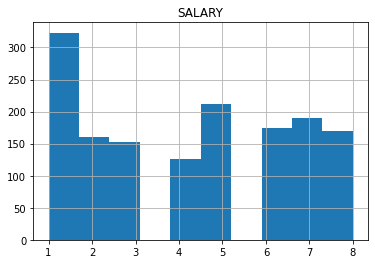

In [1023]:
dropped_df.hist(column = 'SALARY')

In [1024]:
dropped_df = dropped_df.rename(columns = {'SALARY':'target'})

In [1025]:
def features_and_target(df):
    features = df.iloc[:,2:54]
    target = df['target']
    return (features, target)

In [1026]:
features, target = features_and_target(dropped_df)

In [1027]:
features

,AGE,GP,P,P/GP,+/-,Sh%,ixG,iSh,iCF,iFF,...,"x0_LW, C, RW","x0_LW, LD","x0_LW, RW","x0_LW, RW, C",x0_RD,"x0_RD, RW",x0_RW,"x0_RW, C","x0_RW, LW","x0_RW, LW, C"
1,28,42,58,1.38,14,0.16,11.20,106,222,165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,22,52,66,1.27,21,0.18,26.46,214,356,306,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30,52,22,0.42,-18,0.07,6.13,109,236,157,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,30,56,34,0.61,-14,0.08,6.46,95,224,143,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,29,56,50,0.89,12,0.12,22.31,154,265,210,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,26,4,0,0.00,0,0.00,0.26,4,5,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1506,24,25,3,0.12,-3,0.00,2.52,24,41,32,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1507,24,43,17,0.40,17,0.05,3.40,94,164,115,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1508,26,0,0,0.00,0,0.00,0.00,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [1028]:
target.value_counts()

1.0    323
5.0    212
7.0    190
6.0    175
8.0    170
2.0    161
3.0    152
4.0    126
Name: target, dtype: int64

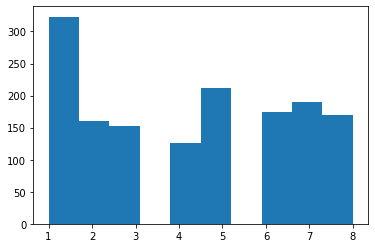

In [994]:
#dropped_df.plot.scatter(x='SALARY',y =a)
import numpy as np
import matplotlib.pyplot as plt
plt.hist(target)
plt.show()